In [71]:
from datetime import datetime
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [58]:
url = "pump_data.csv"
dtype = {
    "unitsequence": int,
    "uppervalue": float,
    "lowervalue": float,
    "rotorspeed": float,
    "motortemp": float,
    "controllertemp": float,
    "dcvoltage": float,
    "motorcurrent": float,
    "rotorposition0": str,
    "rotorposition1": str,
    "rotorposition2": str,
    "rotorposition3": str,
    "rotorposition4": str,
    "magcurrent0": float,
    "magcurrent1": float,
    "magcurrent2": float,
    "magcurrent3": float,
    "magcurrent4": float,
    "magcurrent5": float,
    "magcurrent6": float,
    "magcurrent7": float,
    "magcurrent8": float,
    "magcurrent9": float,
    "sumcurrents": float,
    "tmsactualtemp": float,
    "yh": str,
    "yb": str,
    "z": float,
    "motorspeed": str,
    "temp1": str,
    "temp2": str,
    "heater1": str,
    "heater2": str,
    "tcpressure": str,
    "timestamp": str,
    "currentregen": str,
    "alarmstatusbits": str,
    "alertstatusbits": str,
    "valvestate": str
}
parse_dates = ['timestamp']
x = pd.read_csv(url, dtype=dtype, parse_dates=parse_dates)
print("Shape:", x.shape)

Shape: (1218368, 39)


In [91]:
x.head()

,unitsequence,uppervalue,lowervalue,rotorspeed,motortemp,controllertemp,dcvoltage,motorcurrent,rotorposition0,rotorposition1,...,temp1,temp2,heater1,heater2,tcpressure,timestamp,currentregen,alarmstatusbits,alertstatusbits,valvestate
0,-18202,9.6,7.4,454.0,59.0,35.0,139.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2017-12-14 08:29:30.376350,NaN,NaN,NaN,NaN
1,-18202,0.1,0.5,20.0,34.0,38.0,106.0,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2017-12-22 08:23:45.667057,NaN,NaN,NaN,NaN
2,-18202,0.1,0.5,19.0,34.0,38.0,106.0,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2017-12-22 08:23:46.827219,NaN,NaN,NaN,NaN
3,-18202,0.2,0.5,18.0,34.0,38.0,106.0,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2017-12-22 08:23:47.976902,NaN,NaN,NaN,NaN
4,-18202,0.1,0.5,17.0,34.0,38.0,106.0,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2017-12-22 08:23:49.116823,NaN,NaN,NaN,NaN


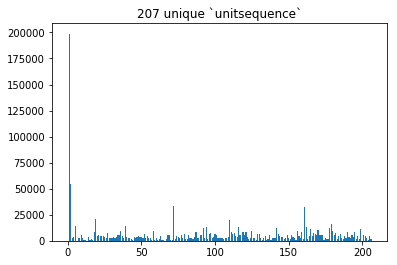

unitsequence ranges from -30997 to -9282
count ranges from 28 to 198742


In [36]:
unit_sequences = x["unitsequence"].unique()
count = np.array([
    x[x['unitsequence']==us].shape[0] for us in unit_sequences
])
n = len(count)
plt.bar(np.arange(n), count)
plt.title("{} unique `unitsequence`".format(n))
plt.show()
print("unitsequence ranges from {} to {}".format(unit_sequences.min(), 
                                                 unit_sequences.max()))
print("count ranges from {} to {}".format(count.min(), count.max()))

In [97]:
u_few, u_many = unit_sequences[0:2]
df = x[x["unitsequence"] == u_many]
cols = ["unitsequence","uppervalue","lowervalue","rotorspeed","motortemp","controllertemp","dcvoltage","motorcurrent","timestamp","alarmstatusbits"]
df[cols].head()

,unitsequence,uppervalue,lowervalue,rotorspeed,motortemp,controllertemp,dcvoltage,motorcurrent,timestamp,alarmstatusbits
28,-18200,0.0,0.0,0.0,30.0,31.0,108.0,0.0,2018-01-05 02:21:22.526119,NaN
29,-18200,0.9,0.9,53.0,33.0,32.0,105.0,11.4,2018-01-05 02:22:27.279240,NaN
30,-18200,1.5,1.2,113.0,35.0,32.0,104.0,11.4,2018-01-05 02:23:22.810394,NaN
31,-18200,1.5,1.1,114.0,35.0,32.0,104.0,11.6,2018-01-05 02:23:23.688371,NaN
32,-18200,1.5,1.2,114.0,35.0,32.0,106.0,6.8,2018-01-05 02:23:24.947600,NaN


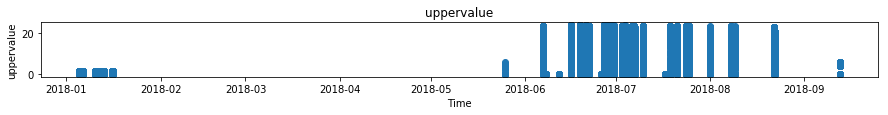

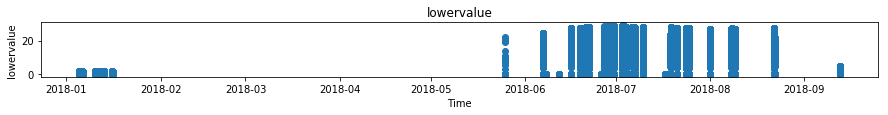

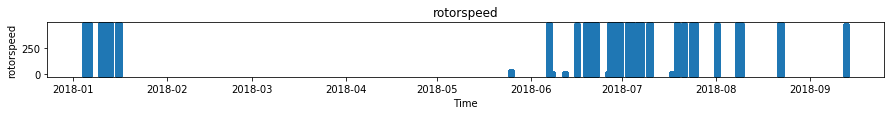

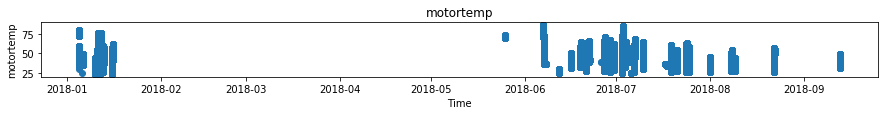

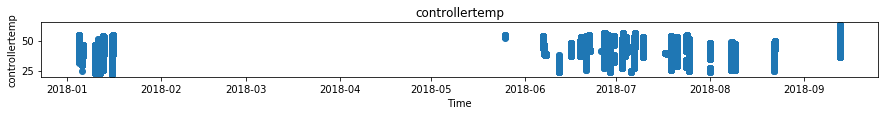

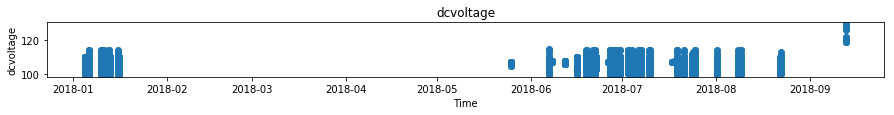

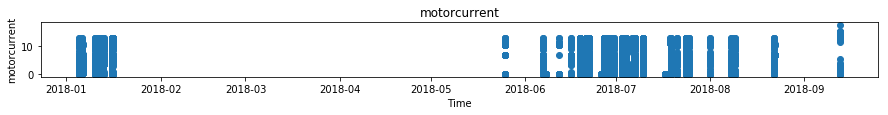

In [100]:
def plot_over_time(t,y,desc):
    fig = plt.figure(figsize=(15,1))
    ax = fig.add_subplot(111)
    ax.plot(t, y, 'o')
    ax.set_xlabel("Time")
    ax.set_ylabel(desc)
    ax.set_title(desc)
    plt.show()

n_timesteps, n_cols = df.shape
t = df["timestamp"].values
cols = ["uppervalue", "lowervalue", "rotorspeed","motortemp","controllertemp","dcvoltage","motorcurrent"]
for col in cols:
    plot_over_time(t,df[col].values,col)


In [57]:
def print_not_null_counts():
    all_cols = list(x.columns.values)
    counts = {}
    for col in all_cols:
        counts[col] = x[x[col].notnull()].shape[0]
    for col, val in sorted(counts.items()):
        print(col, counts[col])
        
print_not_null_counts()

alarmstatusbits 0
alertstatusbits 0
controllertemp 362851
currentregen 802716
dcvoltage 354296
heater1 802716
heater2 802716
lowervalue 415652
magcurrent0 354296
magcurrent1 354296
magcurrent2 354296
magcurrent3 354296
magcurrent4 354296
magcurrent5 354296
magcurrent6 354296
magcurrent7 354296
magcurrent8 354296
magcurrent9 354296
motorcurrent 570796
motorspeed 558108
motortemp 362851
rotorposition0 52801
rotorposition1 52801
rotorposition2 52801
rotorposition3 52801
rotorposition4 52801
rotorspeed 415652
sumcurrents 354296
tcpressure 802716
temp1 802716
temp2 802716
timestamp 1218368
tmsactualtemp 354296
unitsequence 1218368
uppervalue 415652
valvestate 540316
yb 8555
yh 8555
z 68453
